In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

## Explore train_ini.csv

In [2]:
data_path = os.path.join(os.getcwd(), 'F21_proj2_data')
train_ini = pd.read_csv(f'{data_path}/train_ini.csv')

In [3]:
train_ini.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


In [4]:
train_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164115 entries, 0 to 164114
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         164115 non-null  int64  
 1   Dept          164115 non-null  int64  
 2   Date          164115 non-null  object 
 3   Weekly_Sales  164115 non-null  float64
 4   IsHoliday     164115 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 5.2+ MB


In [5]:
train_ini['Date']= pd.to_datetime(train_ini['Date'])

In [6]:
train_ini['Date'] = pd.to_datetime(train_ini['Date'], format='%m%d%y')

In [7]:
train_ini.describe()

,Store,Dept,Weekly_Sales
count,164115.000000,164115.000000,164115.000000
mean,22.151406,44.131889,16079.708833
std,12.775748,30.388825,22885.720761
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2176.000000
50%,22.000000,37.000000,7800.920000
75%,33.000000,72.000000,20271.110000
max,45.000000,99.000000,693099.360000


In [8]:
train_ini

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
164110,45,98,2011-01-28,77.00,False
164111,45,98,2011-02-04,57.25,False
164112,45,98,2011-02-11,388.80,True
164113,45,98,2011-02-18,284.50,False


In [9]:
# substract one day from 2010 to make same weeks in subsequent years
mapped = train_ini.loc[train_ini['Date'].dt.year == 2010, :]['Date'].map(lambda x: x- pd.to_timedelta(1, unit='d'))
for i, v in zip(mapped.index, mapped):
    train_ini.at[i, 'Date'] = v

In [10]:
# did not work
# train_ini.loc[train_ini['Date'].dt.year == 2010, :]['Date'] = train_ini.loc[train_ini['Date'].dt.year == 2010, :]['Date'] - pd.to_timedelta(1, unit='d')

In [11]:
train_ini

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-04,24924.50,False
1,1,1,2010-02-11,46039.49,True
2,1,1,2010-02-18,41595.55,False
3,1,1,2010-02-25,19403.54,False
4,1,1,2010-03-04,21827.90,False
...,...,...,...,...,...
164110,45,98,2011-01-28,77.00,False
164111,45,98,2011-02-04,57.25,False
164112,45,98,2011-02-11,388.80,True
164113,45,98,2011-02-18,284.50,False


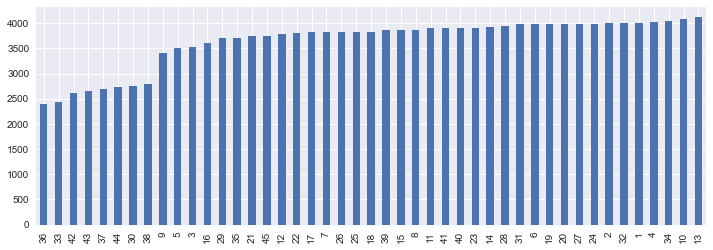

In [12]:
plt.figure(figsize=[12,4])
train_ini.Store.value_counts(ascending=True).plot.bar()
plt.show()

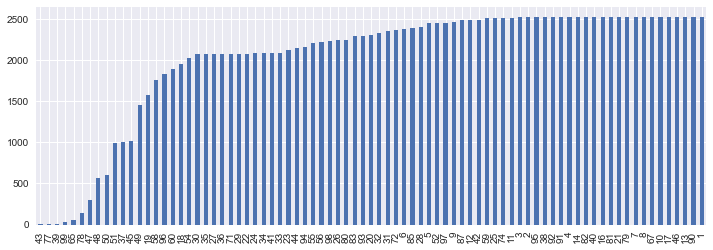

In [13]:
plt.figure(figsize=[12,4])
train_ini.Dept.value_counts(ascending=True).plot.bar()
plt.show()

In [14]:
from pandas_profiling import ProfileReport

In [15]:
profile = ProfileReport(train_ini, title='train_ini Pandas Profiling Report', explorative = True,
                       orange_mode=True)
profile

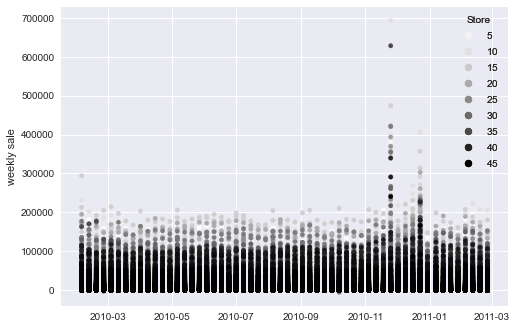

In [16]:
plt.style.use('seaborn')
fig, ax = plt.subplots()

scatter = ax.scatter(train_ini.Date, train_ini.Weekly_Sales, s=20, c=train_ini.Store, alpha=1)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    title="Store")
plt.ylabel('weekly sale')

ax.add_artist(legend1)
plt.show()

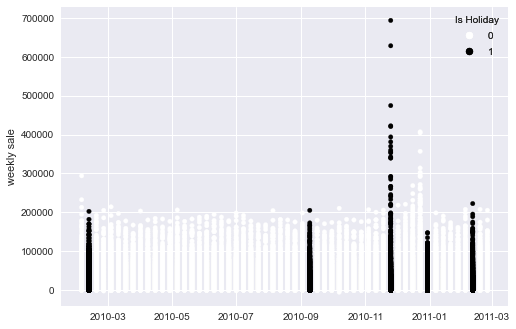

In [17]:
plt.style.use('seaborn')
fig, ax = plt.subplots()

scatter = ax.scatter(train_ini.Date, train_ini.Weekly_Sales, s=20, c=train_ini.IsHoliday, alpha=1)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    title="Is Holiday")
plt.ylabel('weekly sale')

ax.add_artist(legend1)
plt.show()

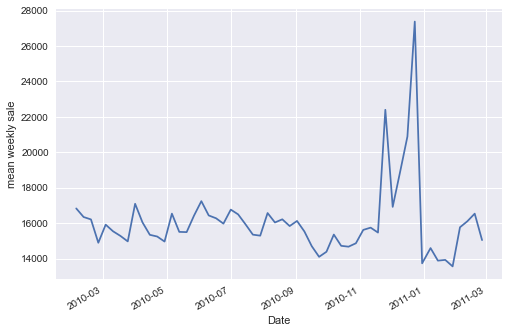

In [18]:
train_ini.groupby(by=['Date']).mean()['Weekly_Sales'].plot()
plt.ylabel('mean weekly sale')
plt.show()

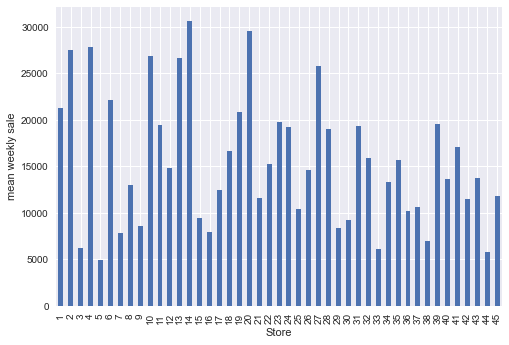

In [19]:
train_ini.groupby(by=['Store']).mean()['Weekly_Sales'].plot.bar()
plt.ylabel('mean weekly sale')

plt.show()

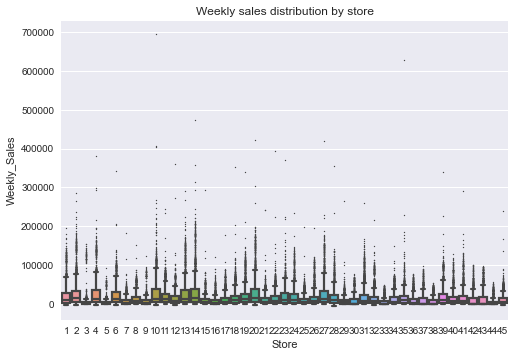

In [95]:
sns.boxplot(x="Store", y="Weekly_Sales", data=train_ini, linewidth=2.2, fliersize=0.5)
plt.title('Weekly sales distribution by store')
plt.savefig('storeSales.png', dpi=1000)
plt.show()

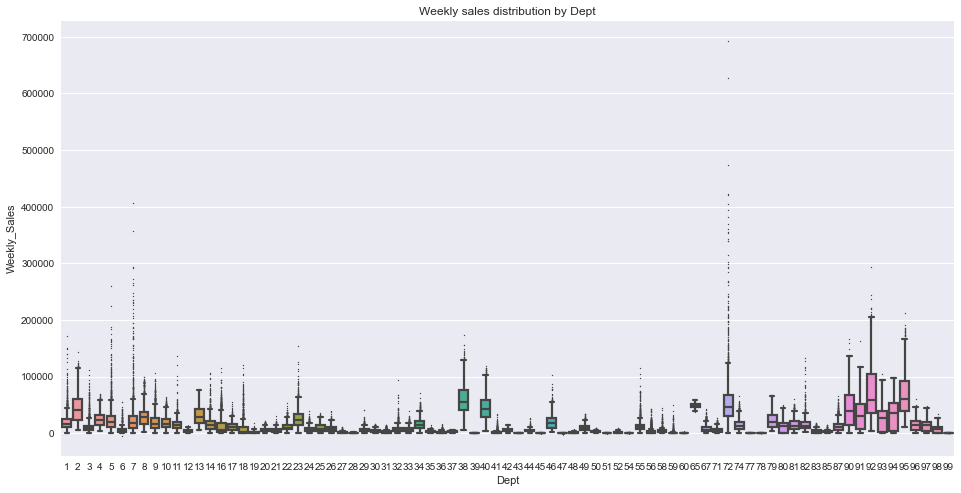

In [97]:
plt.figure(figsize=[16,8])
sns.boxplot(x="Dept", y="Weekly_Sales", data=train_ini, linewidth=2.2, fliersize=0.5)
plt.title('Weekly sales distribution by Dept')
plt.savefig('DeptSales.png', dpi=1000)
plt.show()

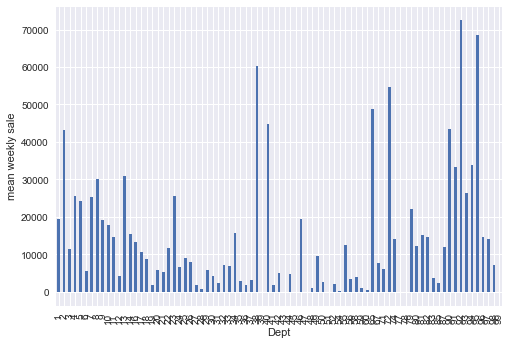

In [21]:
train_ini.groupby(by=['Dept']).mean()['Weekly_Sales'].plot.bar()
plt.ylabel('mean weekly sale')
plt.show()

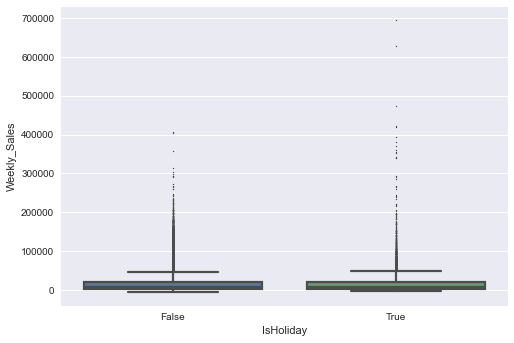

In [22]:
sns.boxplot(x="IsHoliday", y="Weekly_Sales", data=train_ini, linewidth=2.2, fliersize=0.5)
plt.show()

In [23]:
# train_ini

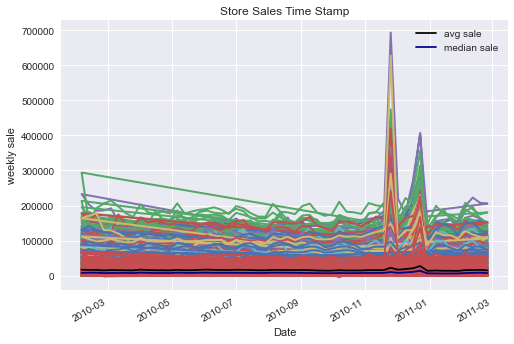

In [93]:
for st in train_ini.Store.unique():
    filt = train_ini.Store == st
    plt.plot(train_ini[filt].Date, train_ini[filt].Weekly_Sales, linewidth=2)
train_ini.groupby(by=['Date']).mean()['Weekly_Sales'].plot(c='black', label='avg sale')
train_ini.groupby(by=['Date']).median()['Weekly_Sales'].plot(c='darkblue', label='median sale')
plt.ylabel('weekly sale')
plt.legend()
plt.title('Store Sales Time Stamp')
plt.savefig('weekly_sale.png', dpi=1000)
plt.show()

In [32]:
from sklearn import preprocessing
def feature_preprocessing_xtrain(train_ini):
    train_ini['Date']= pd.to_datetime(train_ini['Date'])
    train_ini['Date'] = pd.to_datetime(train_ini['Date'], format='%m%d%y')
    train_ini['week'] = train_ini['Date'].dt.week
    train_ini['year'] = train_ini['Date'].dt.year
    lbl = preprocessing.LabelEncoder()
    train_ini['IsHoliday'] = lbl.fit_transform(train_ini['IsHoliday'].astype(str))
    
    return train_ini

In [35]:
train_ini.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,week,year
0,1,1,2010-02-04,24924.50,0,5,2010
1,1,1,2010-02-11,46039.49,1,6,2010


In [36]:
train_ini = feature_preprocessing_xtrain(train_ini)
train_ini.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,week,year
0,1,1,2010-02-04,24924.50,0,5,2010
1,1,1,2010-02-11,46039.49,1,6,2010


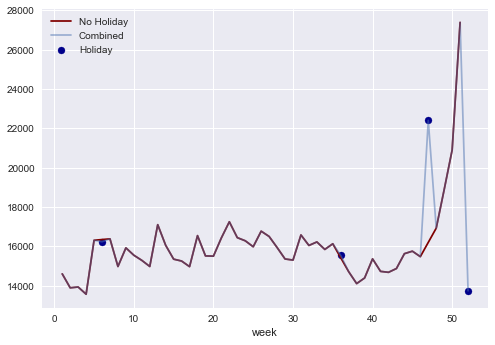

In [37]:
item = train_ini[train_ini['IsHoliday']==1].groupby(by='week').mean()['Weekly_Sales']
plt.scatter(x=item.index, y=item.values, c='darkblue', label='Holiday')
train_ini[train_ini['IsHoliday']==0].groupby(by='week').mean()['Weekly_Sales'].plot(label='No Holiday',
                                                                                   c='maroon')
train_ini.groupby(by='week').mean()['Weekly_Sales'].plot(label='Combined', alpha=.5)
plt.legend()
plt.show()

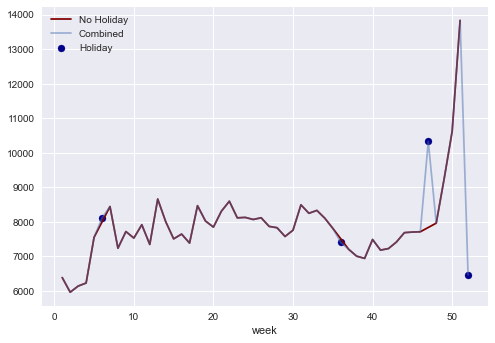

In [38]:
item = train_ini[train_ini['IsHoliday']==1].groupby(by='week').median()['Weekly_Sales']
plt.scatter(x=item.index, y=item.values, c='darkblue', label='Holiday')
train_ini[train_ini['IsHoliday']==0].groupby(by='week').median()['Weekly_Sales'].plot(label='No Holiday',
                                                                                   c='maroon')
train_ini.groupby(by='week').median()['Weekly_Sales'].plot(label='Combined', alpha=.5)
plt.legend()
plt.show()

In [39]:
filt = train_ini['week'] == 51
train_ini[filt].describe()

,Store,Dept,Weekly_Sales,IsHoliday,week,year
count,2956.000000,2956.000000,2956.000000,2956.0,2956.0,2956.0
mean,22.160690,44.133965,27378.692693,0.0,51.0,2010.0
std,12.774852,30.362073,39557.002542,0.0,0.0,0.0
min,1.000000,1.000000,-147.000000,0.0,51.0,2010.0
25%,11.000000,18.000000,3588.065000,0.0,51.0,2010.0
50%,22.000000,38.000000,13832.275000,0.0,51.0,2010.0
75%,33.000000,72.000000,35240.072500,0.0,51.0,2010.0
max,45.000000,99.000000,406988.630000,0.0,51.0,2010.0


In [40]:
filt = train_ini['week'] == 52
train_ini[filt].describe()

,Store,Dept,Weekly_Sales,IsHoliday,week,year
count,2943.000000,2943.000000,2943.000000,2943.0,2943.0,2943.0
mean,22.174992,44.075773,13738.538566,1.0,52.0,2010.0
std,12.772002,30.398554,18532.658923,0.0,0.0,0.0
min,1.000000,1.000000,-698.000000,1.0,52.0,2010.0
25%,11.000000,18.000000,1868.330000,1.0,52.0,2010.0
50%,22.000000,37.000000,6462.160000,1.0,52.0,2010.0
75%,33.000000,72.000000,18236.385000,1.0,52.0,2010.0
max,45.000000,98.000000,147532.160000,1.0,52.0,2010.0


## Make sure holidays of all year fall in the same week

In [53]:
train_ini[train_ini.IsHoliday==1].groupby(by=['IsHoliday', 'week', 'year']).max()

Store  Dept       Date  Weekly_Sales
IsHoliday week year                                      
1         6    2010     45    99 2010-02-11     202622.42
               2011     45    98 2011-02-11     222651.02
          36   2010     45    98 2010-09-09     205314.67
          47   2010     45    98 2010-11-25     693099.36
          52   2010     45    98 2010-12-30     147532.16

In [57]:
f1 = pd.read_csv('fold_1.csv')
for t in range(1, 11, 1):
    f = pd.read_csv(f'fold_{t}.csv')
    f = feature_preprocessing_xtrain(f)
    print(f[f.IsHoliday==1].groupby(by=['IsHoliday', 'week', 'year']).max())

Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales]
Index: []
Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales]
Index: []
Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales]
Index: []
                     Store  Dept       Date  Weekly_Sales
IsHoliday week year                                      
1         36   2011     45    99 2011-09-09     214448.96
                     Store  Dept       Date  Weekly_Sales
IsHoliday week year                                      
1         47   2011     45    99 2011-11-25     649770.18
          52   2011     45    99 2011-12-30     156431.46
                     Store  Dept       Date  Weekly_Sales
IsHoliday week year                                      
1         6    2012     45    99 2012-02-10     233140.32
Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales]
Index: []
Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales]
Index: []
Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales]
Index: []
      

> Holidays in all folds are assigned to the same week. Hence, we can go ahead with our time series model

* There are few weekly sales having negative values, we need to look into it.
* During Nov, and Dec- Holiday period, Sale is very high
* There are few stores that have low mean weekly sale and there are few having high weekly sale, hence this variable is usefull for us.
* Department wise sale is different. Hence, this is also a useful variable.

In [70]:
def feature_preprocessing_xtrain(df):
    df['Date']= pd.to_datetime(df['Date'])
    df['Date'] = pd.to_datetime(df['Date'], format='%m%d%y')
    df['week'] = df['Date'].dt.week
    df['year'] = df['Date'].dt.year
    lbl = preprocessing.LabelEncoder()
    df['IsHoliday'] = lbl.fit_transform(df['IsHoliday'].astype(str))
    
    df.sort_values(['Store','Dept','Date'], ignore_index=True, ascending=True, inplace=True)
    # Creating a column which has the previous week sales as a separate column
    df['Last_Week_Sales'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1)

    col = 'Weekly_Sales'
    for order in [2,3,4]:
        df[f'{col}_D{order}'] = df.groupby(['Store','Dept'])[col].diff(periods=order)
    
#     df = df.dropna(subset = list(df.columns))
    
    return df

In [71]:
train_ini.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,week,year,Last_Week_Sales,Weekly_Sales_D2,Weekly_Sales_D3,Weekly_Sales_D4
0,1,1,2010-02-04,24924.50,0,5,2010,NaN,NaN,NaN,NaN
1,1,1,2010-02-11,46039.49,1,6,2010,24924.5,NaN,NaN,NaN


In [72]:
X = feature_preprocessing_xtrain(train_ini)
X.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,week,year,Last_Week_Sales,Weekly_Sales_D2,Weekly_Sales_D3,Weekly_Sales_D4
0,1,1,2010-02-04,24924.50,0,5,2010,NaN,NaN,NaN,NaN
1,1,1,2010-02-11,46039.49,1,6,2010,24924.5,NaN,NaN,NaN


In [73]:
len(train_ini)

164115

In [74]:
len(X)

164115

In [87]:
X[X.isna()['Weekly_Sales_D4']==True]

,Store,Dept,Date,Weekly_Sales,IsHoliday,week,year,Last_Week_Sales,Weekly_Sales_D2,Weekly_Sales_D3,Weekly_Sales_D4
0,1,1,2010-02-04,24924.50,0,5,2010,NaN,NaN,NaN,NaN
1,1,1,2010-02-11,46039.49,1,6,2010,24924.50,NaN,NaN,NaN
2,1,1,2010-02-18,41595.55,0,7,2010,46039.49,16671.05,NaN,NaN
3,1,1,2010-02-25,19403.54,0,8,2010,41595.55,-26635.95,-5520.96,NaN
56,1,2,2010-02-04,50605.27,0,5,2010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
164014,45,97,2010-02-25,6343.60,0,8,2010,5703.42,1332.24,-2049.62,NaN
164067,45,98,2010-02-04,347.23,0,5,2010,NaN,NaN,NaN,NaN
164068,45,98,2010-02-11,553.25,1,6,2010,347.23,NaN,NaN,NaN
164069,45,98,2010-02-18,281.00,0,7,2010,553.25,-66.23,NaN,NaN


In [89]:
X[X.isna()['Weekly_Sales_D2']==True]

,Store,Dept,Date,Weekly_Sales,IsHoliday,week,year,Last_Week_Sales,Weekly_Sales_D2,Weekly_Sales_D3,Weekly_Sales_D4
0,1,1,2010-02-04,24924.50,0,5,2010,NaN,NaN,NaN,NaN
1,1,1,2010-02-11,46039.49,1,6,2010,24924.50,NaN,NaN,NaN
56,1,2,2010-02-04,50605.27,0,5,2010,NaN,NaN,NaN,NaN
57,1,2,2010-02-11,44682.74,1,6,2010,50605.27,NaN,NaN,NaN
112,1,3,2010-02-04,13740.12,0,5,2010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
163956,45,95,2010-02-11,41131.42,1,6,2010,63833.63,NaN,NaN,NaN
164011,45,97,2010-02-04,8393.22,0,5,2010,NaN,NaN,NaN,NaN
164012,45,97,2010-02-11,5011.36,1,6,2010,8393.22,NaN,NaN,NaN
164067,45,98,2010-02-04,347.23,0,5,2010,NaN,NaN,NaN,NaN
